In [93]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [94]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [95]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [96]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## CustomerID

In [98]:
df.drop('CustomerID', axis =1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Gender

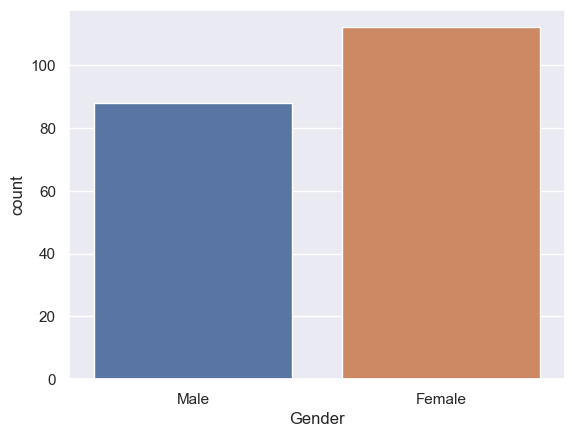

In [99]:
sns.countplot(x= df.Gender);

## Age

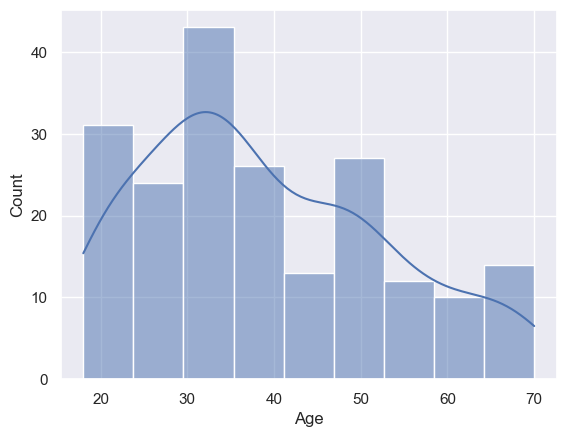

In [100]:
sns.histplot(df.Age, kde=True);

## Annual Income (k$)

In [101]:
df.rename({'Annual Income (k$)': 'Income'}, axis =1, inplace = True)

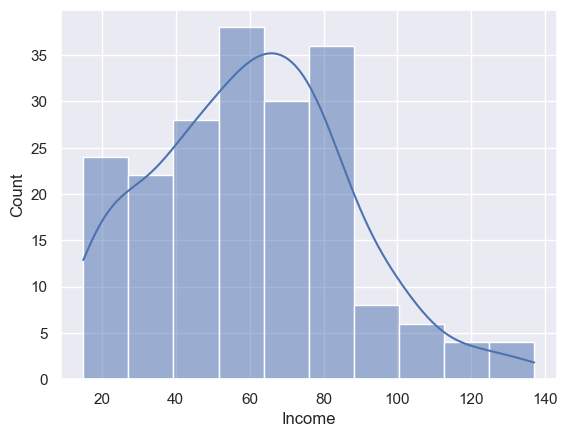

In [102]:
sns.histplot(df.Income, kde=True);

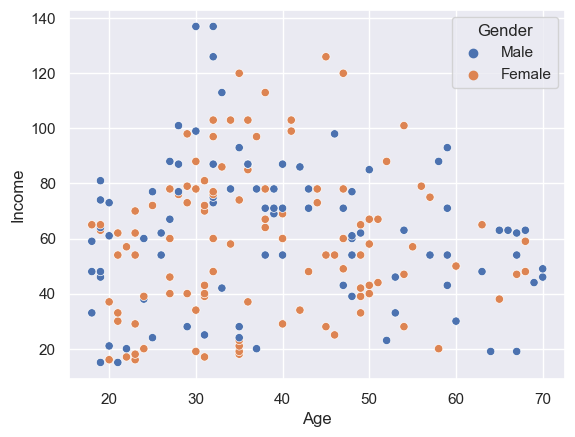

In [103]:
sns.scatterplot(y= df.Income, x= df.Age, hue= df.Gender);

## Spending Score (1-100)

In [104]:
df.rename({'Spending Score (1-100)': 'Score'}, axis =1, inplace = True)

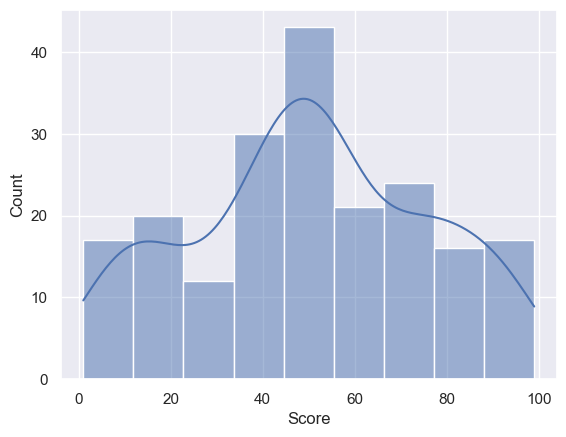

In [105]:
sns.histplot(df.Score, kde=True);

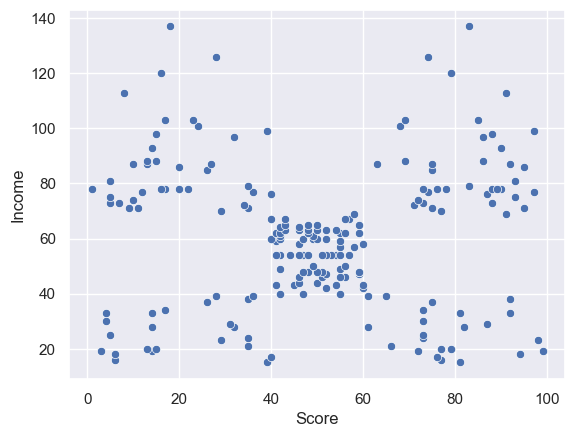

In [106]:
sns.scatterplot(y= df.Income, x= df.Score);

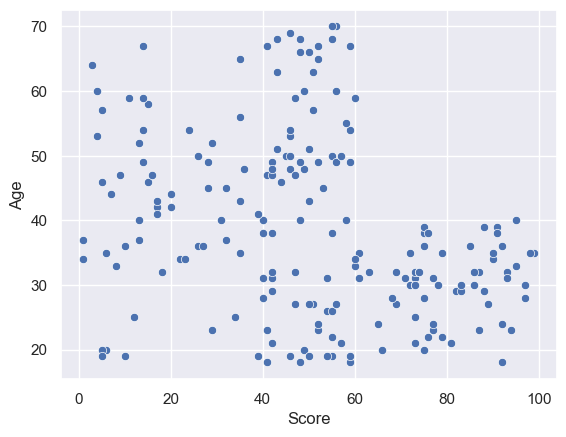

In [107]:
sns.scatterplot(y= df.Age, x= df.Score);

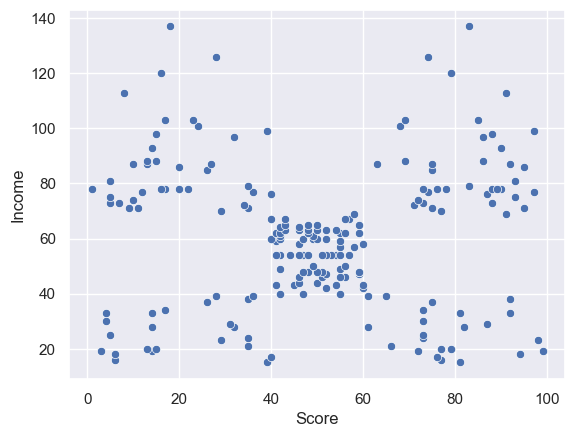

In [108]:
sns.scatterplot(y= df.Income, x= df.Score);

This is the most informative visualization till now, as we can observe about 5 clusters:
1. Low Score, Low Income
2. Low Score, High Income
3. Mid Score, Mid Income
4. High Score, Low Income
5. High Score, High Income

**Considering only those two features, we can build our first**

In [109]:
X= df[['Income', 'Score']].values

In [110]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering using K-means

In [111]:
from sklearn.cluster import KMeans

km5 = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_pred = km5.fit_predict(X_scaled)

In [112]:
km5 = KMeans(n_clusters= 5, init='k-means++', random_state=0)
km5.fit(X_scaled)

KMeans(n_clusters=5, random_state=0)

In [113]:
(y_pred == km5.labels_).all()

True

In [114]:
km5.labels_.shape

(200,)

In [115]:
km5.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [116]:
km5.inertia_

65.56840815571681

In [118]:
km5 = KMeans(n_clusters= 5, init='k-means++', random_state=0)
km5.fit(X_scaled)
km5.score(X_scaled)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
X.shape

(200, 2)

In [ ]:
X[y_pred == 0]

array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]], dtype=int64)

In [ ]:
X[y_pred == 0][:,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [ ]:
X[y_pred == 0,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [ ]:
X[y_pred == 0,1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

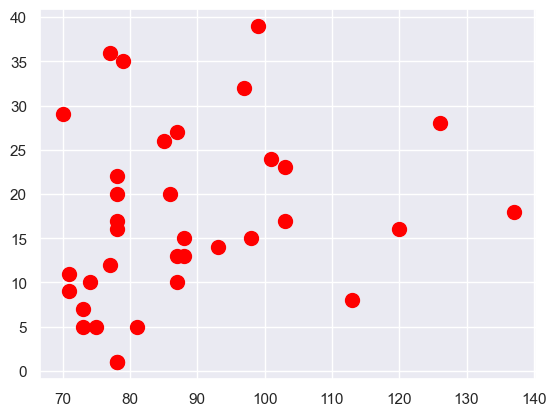

In [ ]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

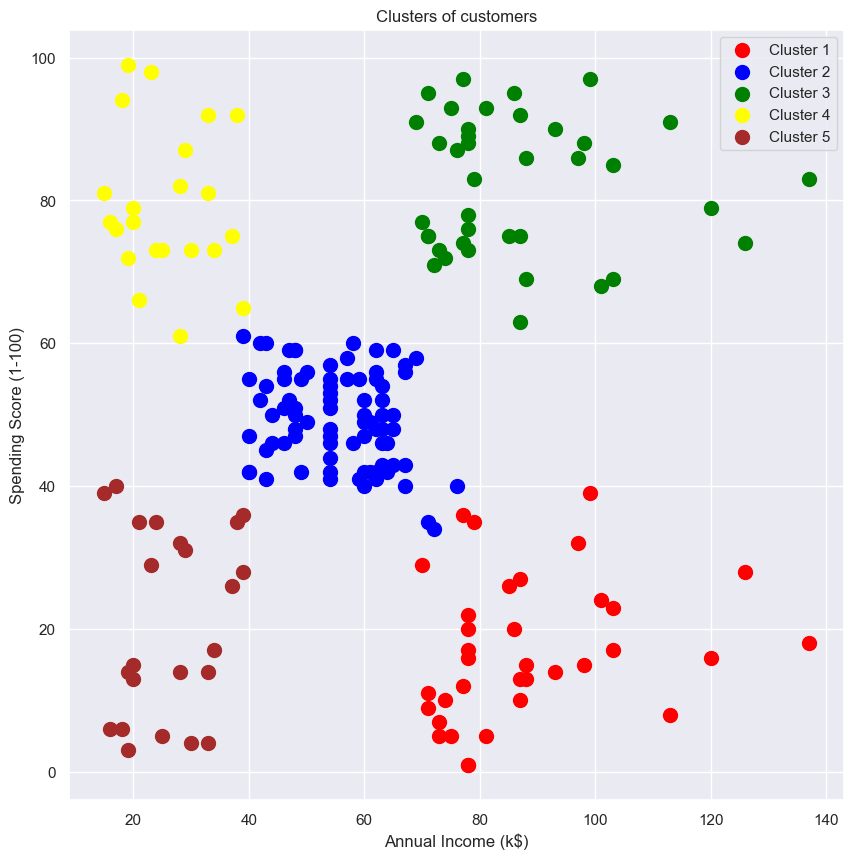

In [ ]:
#Visualizing all the clusters 
plt.figure(figsize=(10,10))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**We can try different number of clusters to find the optimum number of clusters using Elbow Method**

## Elbow Method

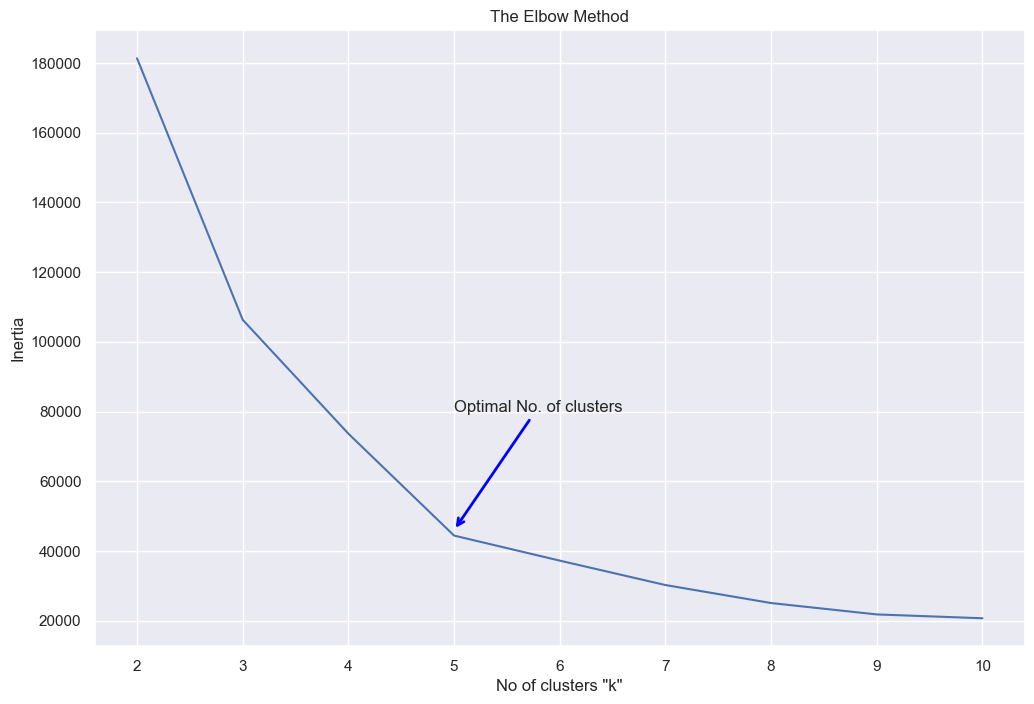

In [ ]:
# Within-cluster Sum of Squares (Inertia)
inertia=[]
k_range= range(2,11)

for i in k_range:
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#Visualizing the ELBOW method to get the optimal value of K 
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=k_range, y=inertia, ax=ax)
plt.title('The Elbow Method')
plt.xlabel('No of clusters "k"')
plt.ylabel('Inertia')

# Annotate arrow
ax.annotate('Optimal No. of clusters', xy=(5, 46000), xytext=(5, 80000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


> ## Elbow Method shows that the optimal number of clusters is 5